# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [8]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [3]:
from numpy import nan as NA
import matplotlib as plt

### Exercise 1
Find the 10 Countries with the most projects, by using value counts on the 'countryname' column and printing the first 10 rows.

To start, we read the file into a new dataframe `json_df` using pandas's `.read_json()` function. We then use `.value_counts()` on the `countryshortname` column to get a pandas series with frequency counts for the values in that column (in this case, names of countries), sorted in descending numerical order. That series is stored as `topcountries`. Finally, we call `.head(10)` on that series to get the first 10 entries.

In [4]:
# read in file
json_df = pd.read_json('data/world_bank_projects.json') 
# get counts for the values in the 'countryshortname' column, sorted in descending order.
topcountries = json_df['countryshortname'].value_counts() 
# return first 10 results
topcountries.head(10)

Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Nepal                 12
Bangladesh            12
Morocco               12
Mozambique            11
Africa                11
Name: countryshortname, dtype: int64

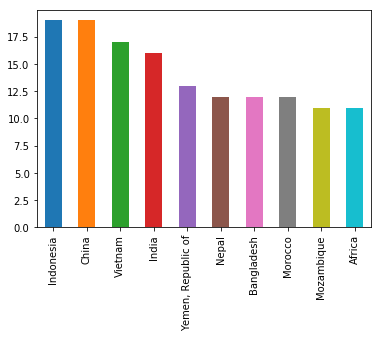

In [6]:
topcountries.head(10).plot(kind='bar')

One interesting detail to note here is that `Africa` is included in the list of countries, despite it being a continent and not a single country. We could filter out all projects where `countryshortname == Africa`, but it's possible that those projects have a value of `Africa` for a specific reason (such as their covering multiple countries within the continent). Looking at the borrowers and project names for these specific projects would support this assumption:

In [7]:
# Get all projects from json_df where 'countryshortname' is 'Africa'.
filtered = json_df[json_df['countryshortname']=="Africa"]
# Show only the countryshortname and regionname columns.
filtered[['borrower','project_name']]

,borrower,project_name
45,ECOWAS,West Africa Regional Disease Surveillance Cap...
46,UGANDA-COMOROS,RCIP4 - Regional Communications Infrastructure...
51,"OSS, IUCN, CILSS","Building Resilience through Innovation, Commun..."
58,BANK EXECUTED,Fighting against wildlife poaching and illegal...
65,"BURUNDI,RWANDA,TANZANIA",Regional Rusumo Falls Hydroelectric Project
99,GOVERNMENT OF MALI,Additional Financing-West Africa Agricultural ...
167,MINISTRIES OF TELECOM AND ICT,West Africa Regional Communications Infrastruc...
184,TANZANIA,Southern Africa Trade and Transport Facilitati...
287,"MALAWI, MOZAMBIQUE, ZAMBIA",Agricultural Productivity Program for Southern...
353,NILE BASIN INITIATIVE,Nile Cooperation for Results Project


Of the 11 projects where Africa is listed as the country, all but four of them have either multiple governments or international organizations as the borrower. 

In [8]:
for i in filtered['project_name'].loc[[58,99,184,449]]:
    print(i)

Fighting against wildlife poaching and illegal trade in Africa
Additional Financing-West Africa Agricultural Productivity Program 2A
Southern Africa Trade and Transport Facilitation Project
First Part of the Second Phase of the Niger Basin Water Resources Development and Sustainable Ecosystems Management Program - APL 2A


The other four projects' names suggest a multinational scope for those projects. 

### Exercise 2
Find the top 10 major project themes (using column 'mjtheme_namecode').

In [9]:
# Load the json file.
j_form = json.load(open('data/world_bank_projects.json'))
# Use json_normalize() to create a table from the mjtheme_namecode nested element.
j_norm = json_normalize(j_form,'mjtheme_namecode')
# convert the 'code' column to numeric
j_norm.code=pd.to_numeric(j_norm.code)
# Show first 5 results 
j_norm.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


It looks like some of the rows have blank strings under the `name` column. This means we cannot just do `.value_counts()` on that column, since there will be several missing values.  

In [10]:
# Group the project theme instances by code and name, and find the size of each group
themes = j_norm.groupby(['code','name']).size()
# Give the series the name 'counts'
themes = themes.rename('counts')
# drop 'name' as one of the index levels
themes = themes.reset_index('name')
themes

,name,counts
code,,
1,,5
1,Economic management,33
2,,15
2,Public sector governance,184
3,,3
3,Rule of law,12
4,,16
4,Financial and private sector development,130
5,,5


Now that the project themes are grouped together and counted, it should be easier to clean up the data and replace the empty strings with the correct theme names corresponding to each code. 

In [15]:
# Replace empty strings with NA
themes.name=themes.name.replace('',NA)
# Fill in each NA name value with the entry that comes immediately after it
themes.name.fillna(method='bfill',inplace=True)
themes

,name,counts
code,,
1,Economic management,5
1,Economic management,33
2,Public sector governance,15
2,Public sector governance,184
3,Rule of law,3
3,Rule of law,12
4,Financial and private sector development,16
4,Financial and private sector development,130
5,Trade and integration,5


Now all we need to do is to group the rows in the `themes` dataframe by `code` and `name` again, and sum the values in the `counts` column to get the counts for each theme. We then sort that dataframe by `counts` in descending order and call `.head(10)` to show the top 10 project themes.

In [16]:
# Sum each ['code', 'name'] group together to get the full counts for each project theme.
top_themes=themes.groupby(['code','name']).sum()
# Sort the counts in descending order and get the top 10 project themes.
top_themes.sort_values(by='counts', ascending=False).head(10)

,,counts
code,name,
11,Environment and natural resources management,250
10,Rural development,216
8,Human development,210
2,Public sector governance,199
6,Social protection and risk management,168
4,Financial and private sector development,146
7,Social dev/gender/inclusion,130
5,Trade and integration,77
9,Urban development,50


### Exercise 3
Create a dataframe with the missing names filled in.

We start by creating a dictionary, with the codes as the keys and the names as the values.

In [22]:
# For each 'code' group, the max value under the name column is the theme name corresponding with the theme code,
# and not the empty string.
table = j_norm.groupby(['code']).max()
# convert the name column of the dataframe to a dictionary 
tdict=table.name.to_dict()
tdict

code
1                              Economic management
2                         Public sector governance
3                                      Rule of law
4         Financial and private sector development
5                            Trade and integration
6            Social protection and risk management
7                      Social dev/gender/inclusion
8                                Human development
9                                Urban development
10                               Rural development
11    Environment and natural resources management
Name: name, dtype: object

We then use the dictionary to fill in the missing names using the `.map()` function on the `code` column.

In [24]:
# copy j_norm
j_norm_clean = j_norm.copy()
# use map to assign new values to the 'name' column based on the corresponding key in the 'code' column
j_norm_clean['name']=j_norm_clean.code.map(tdict)
j_norm_clean

,code,name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion
